# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [80]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [81]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [174]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [175]:

print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [199]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [82]:
from sklearn.model_selection import train_test_split
X, y = california['data'], california['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

In [201]:
y.shape

(20640,)

In [203]:
y_train.shape, y_test.shape

((16512,), (4128,))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

### Resolución

#### 1) Descripción del dataset

Este dataset es un extracto de los datos obtenidos en el censo de 1990 por el U.S. Census Bureau y refleja información de viviendas (*houses*), hogares (*households*) y población por radio censal (*block group*) de distritos de California.

#### 2) Variable objetivo

La variable objetivo (*target*) es la **mediana de los valores de viviendas** para los distritos de California.
Este valor representa en un conjunto ordenado de los valores de viviendas en un radio censal, el punto medio de de dichos valores, es decir que el 50% de los valores estarán a la izquierda de la mediana y el 50% de los valores estarán a la derecha de la misma.

#### 3) Atributos del dataset

El dataset contiene los siguientes atributos:

- **MedInc**:        mediana de los ingresos en el radio censal; no está especificada la unidad de los valores, ni tampoco está especificado si estos ingresos están registrados por vivienda, hogar o persona censada.
- **HouseAge**:      mediana de la antigüedad de las viviendas en el radio censal
- **AveRooms**:      número promedio de ambientes; no está especificado si estos valores fueron registrados por vivienda o por hogar
- **AveBedrms**:     número promedio de dormitorios; ; no está especificado si estos valores fueron registrados por vivienda o por hogar
- **Population**:    población del radio censal
- **AveOccup**:      ocupación promedio de la vivienda
- **Latitude**:      latitud del radio censal
- **Longitude**:     longitud del radio censal


#### 4) Atributos más determinantes

El valor de una propiedad es un valor subjetivo sujeto a factores varios como por ejemplo: antigüedad de la vivienda, tamaño, cantidad de amnbientes, área en la que está ubicada; mientras que algunos atributos son fáciles de determinar como la antigüedad de la propiedad o la cantidad de dormitorios que tiene, otros atributos como la valorización que da el áreaen la que está ubicada la vivienda, es más difícil de fijar; sin embargo, podría inferirse un valor a partir de otros atributos como el ingreso promedio de los habitantes de dicha área.
Es por esto, que de los atributos disponibles, consideramos importantes para la predicción del valor de la propiedad los siguientes:

- **MedInc**
- **HouseAge**
- **AveBedrms**
- **AveOccup**

No se consideran determinantes los siguientes atributos:

- **AveRooms**: se entiende que esta variable aporta menos información que **AveBedrms** en cuanto a valor de vivienda; como ejemplo, una propiedad con muchos ambientes y pocos dormitorios podría ser valiosa, pero probablemente no tendría propósito de residencia.
- **Population**: se entiende que existen propiedades valiosas o poco valiosas tanto en áreas densamente pobladas como en áreas despobladas.
- **Latitude** y **Longitude**: serían interesantes utilizando técnicas de análisis espacial, pero no es este el caso.

#### 5) Riesgos potenciales del dataset

Este dataset que combina información de propiedades, población e ingresos permitiría hacer inferencias socioeconómicas sobre las áreas incluidas; dichas inferencias pueden ser utilizadas en distintos ámbitos y con distintos propósitos no siempre conocidos de antemano; por ejemplo, podrían ser utilizadas por áreas del gobierno para definir políticas públicas, pero también pueden ser utilizadas por el sector privado para decidir estrategias de negocios (desarrollo urbanístico, estrategias comerciales por zona); también podría utilizarse esta información para complementar perfiles de riesgo tanto de viviendas como de personas.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

### Resolución

#### 1) Visualización de atributos


In [83]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

calif_houses_df = pd.DataFrame(X, columns=california['feature_names'])
calif_houses_df['HouseValue'] = pd.Series(y)

##### a.- MedInc

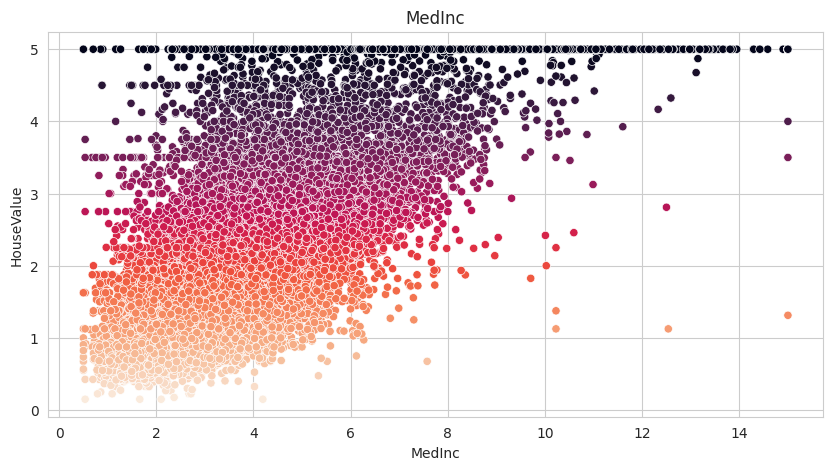

In [36]:
feature = 'MedInc'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df, x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

##### b.- HouseAge

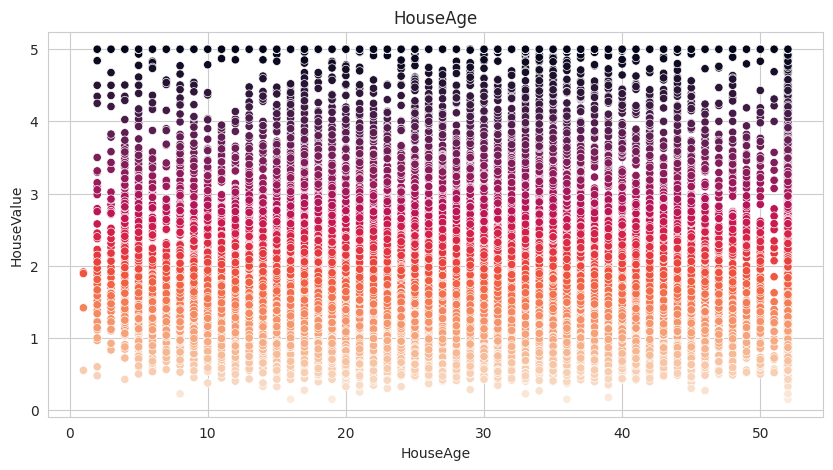

In [37]:
feature = 'HouseAge'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df, x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

##### c.- AveRooms

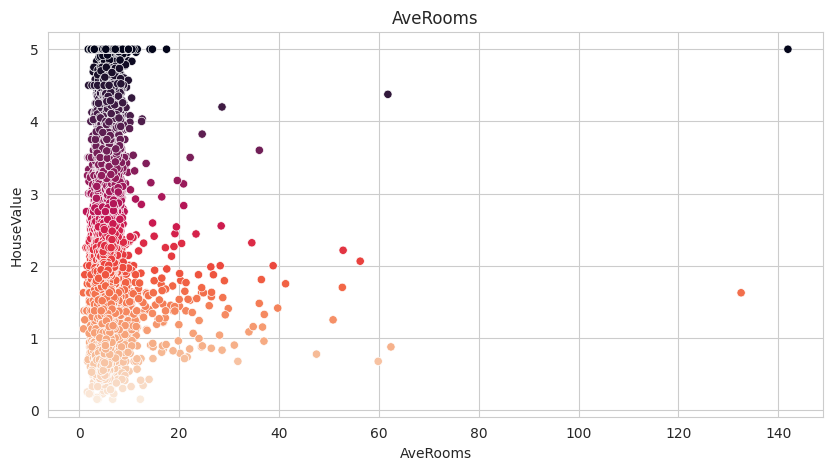

In [38]:
feature = 'AveRooms'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df, x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

##### d.- AveBedrms

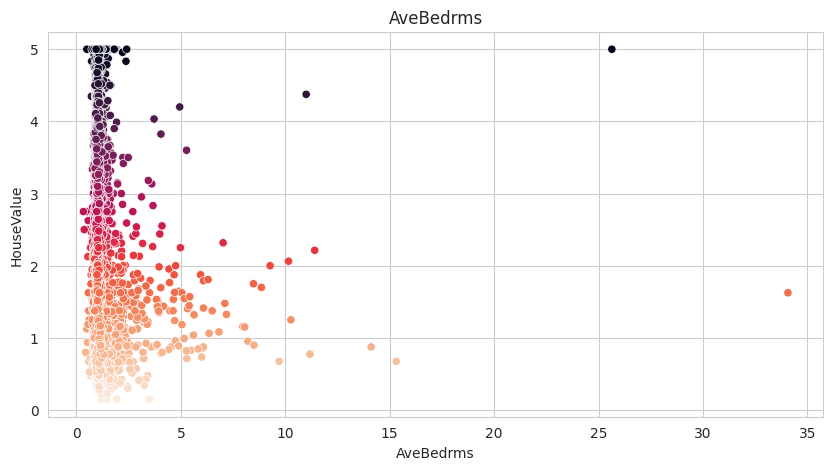

In [39]:
feature = 'AveBedrms'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df, x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

##### e.- Population

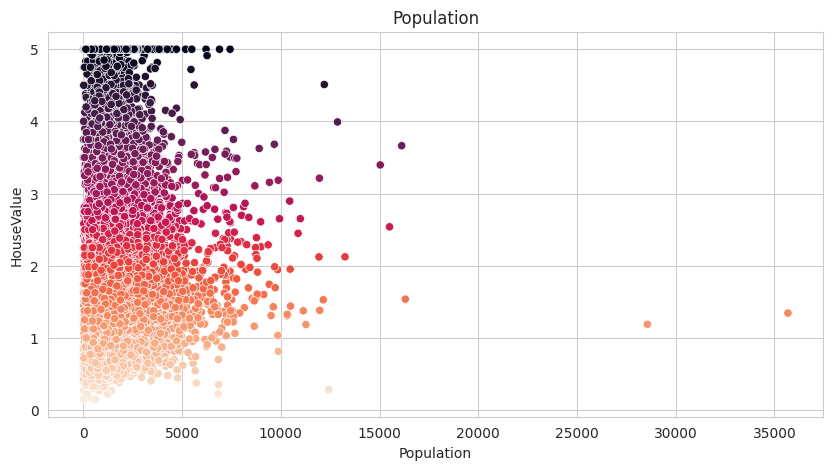

In [40]:
feature = 'Population'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df, x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

##### f.- AveOccup

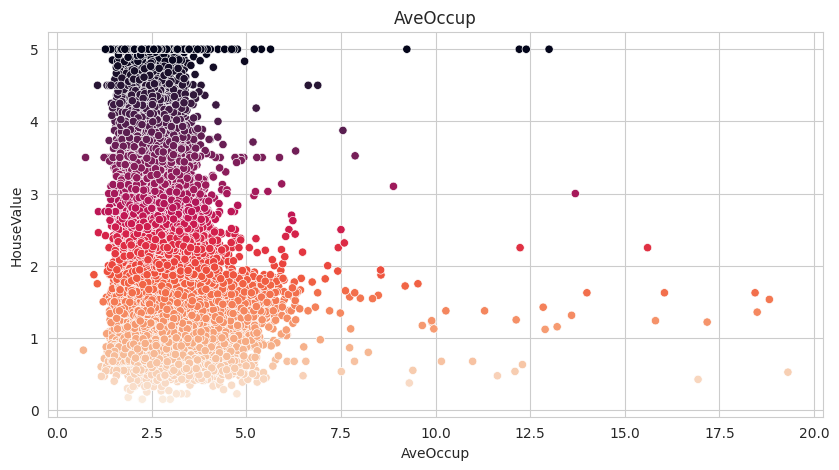

In [46]:
feature = 'AveOccup'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df[calif_houses_df[feature] < 20], x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

##### g.- Latitude

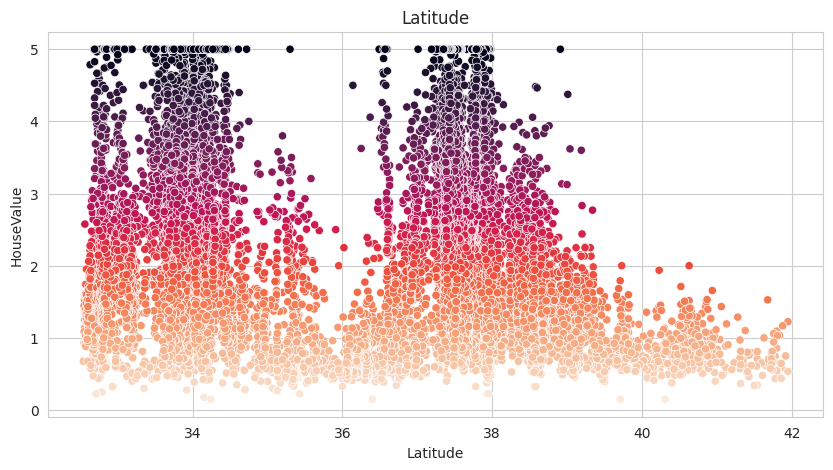

In [42]:
feature = 'Latitude'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df, x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

##### h.- Longitude

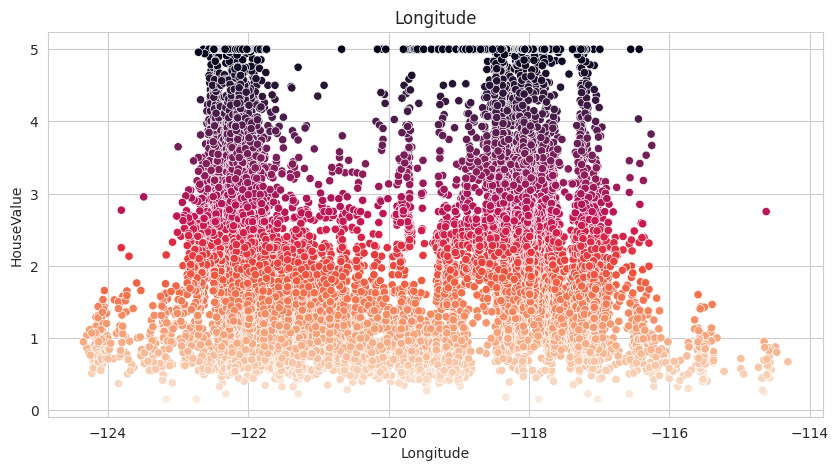

In [43]:
feature = 'Longitude'

plt.figure(figsize=(10, 5))
sns.scatterplot(data=calif_houses_df, x=feature, y='HouseValue',
                    hue='HouseValue', palette='rocket_r', legend=False)
plt.title(feature)
plt.show()

#### 2) Exploración visual de atributos

Una exploración visual de los atributos permite observar los siguientes puntos:

- **MedInc**: este atributo parece presentar una relación lineal entre el atributo y la variable objetivo: a mayores ingresos, mayor valor de la propiedad; también es posible observar ciertos valores constantes de propiedades (líneas horizontales en los valores múltiples de 0.5, sobre todo a partir de 3); de estos valores constantes, el valor 5 llama la atención sobre todo en los valores altos del atributo MedInc: se podría entender que en el valor 5 se concentran todos los valores de propiedades iguales o mayores a 5. *Este atributo podría aportar información valiosa a la predicción*.
- **HouseAge**: este atributo parece estar distribuido homogéneamente en relación a la variable objetivo, y no aparece una relación lineal clara entre las dos variables; se podría explorar una transformación numérica del atributo (logarítmica o cuadrática) para investigar si con la transformación aparece una relación lineal más clara; también se observa una concentración de valores en el valor 52 de HouseAge: se podría entender también aquí que se usó este valor para interpretar antigüedades iguales o mayores de 52. *No esté claro que este atributo pueda aportar información valiosa a la predicción*.
- **AveRooms**: este atributo parece mostrar dos comportamientos bien diferenciados: en propiedades de hasta 10 ambientes en promedio, los valores de las propiedades parecen distribuirse homogéneamente, no aportando demasiada información para el modelo; sin embargo, en propiedades con més de 10 ambientes en promedio, parece surgir un patrón similar a una relación lineal. *Este atributo podría aportar información valiosa a la predicción*.
- **AveBedrms**: este atributo parece comportarse de manera similar a *AveRooms* mostrando un comportamiento homogéneo en relación al valor de la propiedad, en viviendas con hasta un dormitorio en promedio, y mostrando un patrón que podría modelarse con una relación lineal en valores mayores a 1. *Este atributo podría aportar información valiosa a la predicción*.
- **Population**: este atributo parece mostrar una relación lineal inversa: las propiedades con mayores valores parecen acumularse en los radios censales con menor cantidad de habitantes. *Este atributo podría aportar información valiosa a la predicción*.
- **AveOccup**: este atributo parece mostrar una relación lineal inversa: las propiedades con mayores valores parecen acumularse en los radios censales con menor ocupación promedio. *Este atributo podría aportar información valiosa a la predicción*.
- **Latitude**: este atributo parece mostrar un patrón multimodal en torno a ciertas latitudes: las propiedades con mayores valores parecen acumularse en los radios censales alrededor de los 33° (San Diego), 34° (Los Ángeles) y 37° (San Francisco) de latitud norte. *Este atributo podría aportar información valiosa a la predicción*.
- **Longitude**: este atributo parece mostrar un patrón multimodal en torno a ciertas longitudes: las propiedades con mayores valores parecen acumularse en los radios censales alrededor de los 117° (San Diego), 118° (Los Ángeles) y 122° (San Francisco) de longitud oeste. *Este atributo podría aportar información valiosa a la predicción*.

#### 3) Priorización de atributos

Encontramos que este es el orden de importancia de los atributos del data set (ordenados de mayor a menor) para la predicción de la variable objetivo:

1. MedInc
2. Population
3. AveOccup
4. AveBedrms
5. AveRooms
6. Latitude
7. Longitude
8. HouseAge


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

### Resolución

#### 1) Variable independiente

In [84]:
feature = 'MedInc'
selector = (np.array(california['feature_names']) ==  feature)

X_train_feat = X_train[:, selector]
X_test_feat = X_test[:, selector]
X_train_feat.shape, X_test_feat.shape

((16512, 1), (4128, 1))

#### 2) Modelo 

Se completa la matriz de observaciones con 1 en la primer columna para el coeficiente correspondiente a la ordenada al origen para el conjunto de entrenamiento (*X_train*) y para el conjunto de evaluación (*X_test*). 

In [85]:
feat_train_size = X_train_feat.shape[0]
X_train_LR = pd.DataFrame({'intercept': np.ones(feat_train_size), feature: X_train_feat.reshape((feat_train_size,))})

feat_test_size = X_test_feat.shape[0]
X_test_LR = pd.DataFrame({'intercept': np.ones(feat_test_size), feature: X_test_feat.reshape((feat_test_size,))})

print("LR train dataset: \n", X_train_LR.head(), "\n \nLR test dataset: \n", X_test_LR.head())

LR train dataset: 
    intercept  MedInc
0        1.0  4.2386
1        1.0  4.3898
2        1.0  3.9333
3        1.0  1.4653
4        1.0  3.1765 
 
LR test dataset: 
    intercept  MedInc
0        1.0  4.1518
1        1.0  5.7796
2        1.0  4.3487
3        1.0  2.4511
4        1.0  5.0049


Se entrena el modelo de regresión lineal

In [86]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
lr.fit(X_train_LR, y_train)

print("Coefficients: \n", lr.coef_)

Coefficients: 
 [0.44320635 0.42032178]


Se realiza una predicción a partir del modelo entrenado utilizando las observaciones de entrenamiento y de evaluación.

In [87]:
y_train_pred = lr.predict(X_train_LR)
y_test_pred = lr.predict(X_test_LR)

print("LR train prediction: \n", y_train_pred, "\n\nLR test prediction: \n", y_test_pred)

LR train prediction: 
 [2.22478224 2.28833489 2.096458   ... 1.7872693  2.81024844 1.02669704] 

LR test prediction: 
 [2.18829831 2.87249809 2.27105966 ... 1.78937091 3.02549522 1.84397071]


#### 3) Evaluación del modelo 

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Train dataset assesment")
# The mean squared error
print("Mean squared error: %.2f" % mse_train)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))

print("\n\nTest dataset assesment")
# The mean squared error
print("Mean squared error: %.2f" % mse_test)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_test_pred))

Train dataset assesment
Mean squared error: 0.70
Coefficient of determination: 0.48


Test dataset assesment
Mean squared error: 0.72
Coefficient of determination: 0.45


#### 4) Representación gráfica del modelo

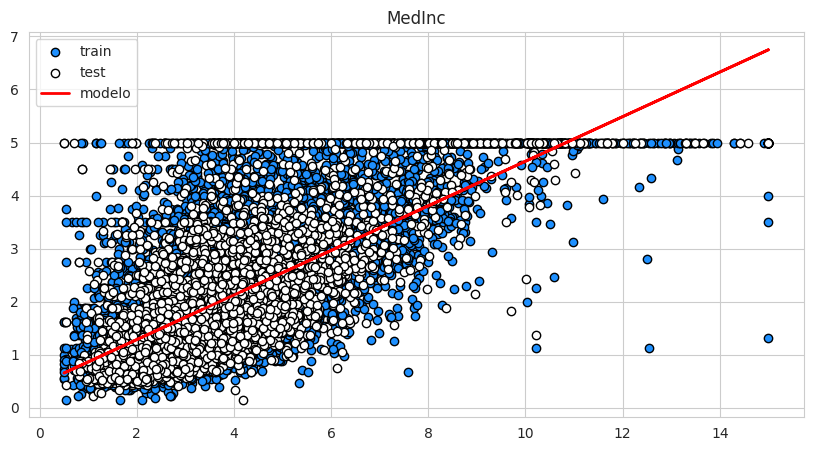

In [89]:
x_start = min(np.min(X_train_feat), np.min(X_test_feat))
x_end = max(np.max(X_train_feat), np.max(X_test_feat))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.scatter(X_train_feat, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_feat, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X_test_feat, y_test_pred, color="red", label="modelo", linewidth=2)
plt.title(feature)
plt.legend()
plt.show()

#### 5) Interpretación del modelo

El entrenamiento del modelo de regresión lineal tomando como variable independiente al atributo *MedInc* arrojó la siguiente recta de ajuste 
> $\hat{Y} = 0.443 + 0.42 \times MedInc$

Puede observarse al comparar los errores cuadráticos medios de los conjuntos de entrenamiento y de prueba que el error es mayor en el conjunto de pruebas, indicando que el modelo entrenado se comportó peor con datos nuevos.

Esto se comprueba al comparar los coeficientes de determinación de ambos conjuntos de datos, ya que se ve el $R^2$ del conjunto de pruebas es menor al del conjunto de entrenamiento.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

### Resolución

#### 1) Modelos polinomiales en varios grados

Utilizando la variable *MedInc*, se entrenarán regresiones polinómicas de varios grados diferentes y se compararán entre sí para descubrir cuál es el modelo que ajusta mejor. 

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

##### a.- Ejemplo de grado 2

Una regresión polinómica de grado 2 tiene la siguiente forma: 

> $\hat{Y} = \Beta_{0} + \Beta_{1} \times MedInc + \Beta_{2} \times MedInc^2$

Si se entrena el modelo, se obtiene

In [91]:
degree = 2
pf = PolynomialFeatures(degree, include_bias=False)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

# train with MedInc
model.fit(X_train_feat, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [92]:
print("Ordenada al origen: ",lr.intercept_)
print("\nCoeficientes: ",lr.coef_)

Ordenada al origen:  0.0

Coeficientes:  [ 0.60919976 -0.01614862]


##### b.- Comparación de modelos de diferentes grados

Para este ejercicio se compararán polinomios de distintos grados entre 1 y 100

In [93]:
# estas dos variables guardaran los errors de ajuste del conjunto de entrenamiento (train) y de pruebas (test)
train_errors = []
test_errors = []

print("Error de entrenamiento vs error de test")
print("=======================================")

# entrenamiento de modelos de grado [degrees] y prediccion de valores de dichos modelos
degrees = [1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 20, 30, 50, 100]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree, include_bias=False)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_feat, y_train)

    # predict:
    y_train_pred = model.predict(X_train_feat)
    y_test_pred = model.predict(X_test_feat)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    print(f"Grado {degree}: \t {train_error:.3f}  -  \t {test_error:.3f}")

Error de entrenamiento vs error de test
Grado 1: 	 0.734  -  	 0.766
Grado 2: 	 0.692  -  	 0.722
Grado 3: 	 0.691  -  	 0.722
Grado 4: 	 0.684  -  	 0.714
Grado 5: 	 0.680  -  	 0.710
Grado 10: 	 0.674  -  	 0.704
Grado 11: 	 0.673  -  	 0.704
Grado 12: 	 0.674  -  	 0.703
Grado 13: 	 0.678  -  	 0.708
Grado 14: 	 0.706  -  	 0.743


Grado 15: 	 0.759  -  	 0.805
Grado 20: 	 3.158  -  	 3.170
Grado 30: 	 5.058  -  	 5.080
Grado 50: 	 5.467  -  	 5.632
Grado 100: 	 5.548  -  	 34.938


#### 2) Errores de ajuste de los modelos

Se presentan dos gráficos con la comparacián entre errores de entrenamiento y de prueba para polinomios de diferentes grados:

 - gráfico completo: se incluyen todos los grados de polinomios analizados
 - gráfico detallado: solo se incluyen los grados 10 a 15, en los que parece encontrarse un punto de inflexión entre los errores de ajuste tanto de entrenamiento como de prueba

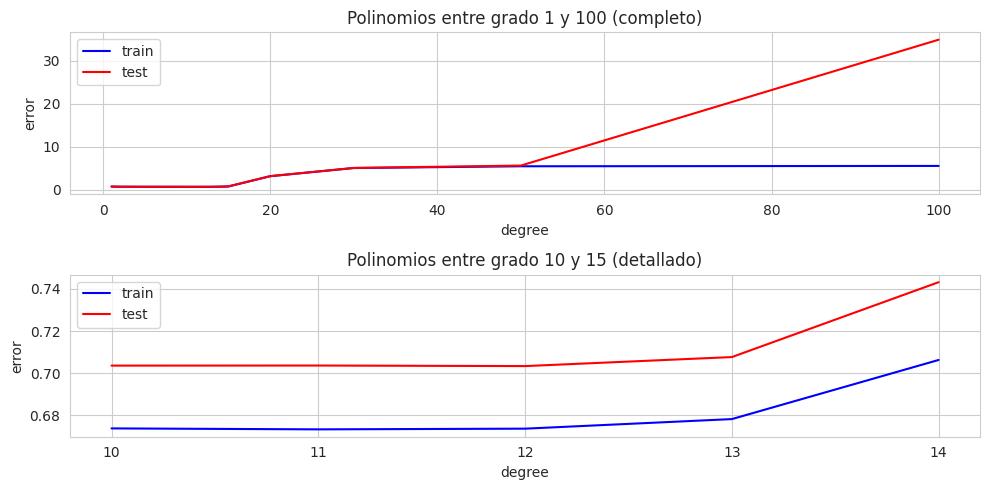

In [94]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5))

ax1.plot(degrees, train_errors, color="blue", label="train")
ax1.plot(degrees, test_errors, color="red", label="test")
ax1.legend()
ax1.set(xlabel="degree", ylabel="error")
ax1.set_title("Polinomios entre grado 1 y 100 (completo)")

ax2.plot(degrees[5:10], train_errors[5:10], color="blue", label="train")
ax2.plot(degrees[5:10], test_errors[5:10], color="red", label="test")
ax2.legend()
ax2.set(xlabel="degree", ylabel="error")
ax2.set_title("Polinomios entre grado 10 y 15 (detallado)")
ax2.set_xticks(degrees[5:10]) 

fig.tight_layout()

#### 3) Interpretación de curvas de errores 

Es posible observar como el error de entrenamiento baja a medida que se aumenta el grado del polinomio, pero solo hasta un punto: le polinomio de grado 12; luego el error de entrenamiento empieza a subir.
Este fenómeno se da de manera similar con el conjunto de prueba, también hasta el grado de 12; sin embargo, el conjunto de pruebas comienza a alejarse en el error de ajuste de los resultados del conjunto de entrenamiento alrededor del grado 30.

Puede considerarse que el sobreajuste comienza a partir del grado 13

#### 4) Mejor polinomio

Por lo observado en los puntos anteriores, el mejor polinomio para ajustar los datos es el de grado 12, ya que es el que menor error de ajuste produce tanto en el conjunto de entrenamiento como en el conjunto de prueba.

In [95]:
degree = 12
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_feat, y_train);

In [96]:
x = X[:,:1]
y = model.predict(x).reshape(-1,1)
x, y

(array([[8.3252],
        [8.3014],
        [7.2574],
        ...,
        [1.7   ],
        [1.8672],
        [2.3886]]),
 array([[4.2728496 ],
        [4.26298075],
        [3.77107299],
        ...,
        [1.07966141],
        [1.13090907],
        [1.37744125]]))

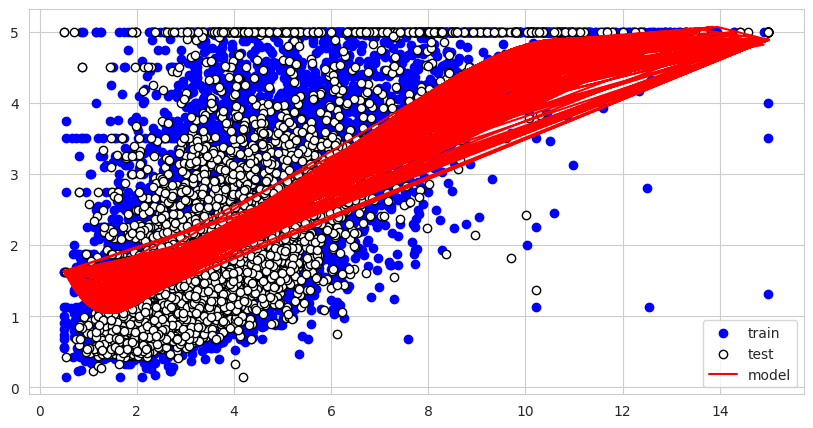

In [97]:
plt.figure(figsize=(10, 5))
plt.scatter(X_train_feat, y_train, color="blue", label="train")
plt.scatter(X_test_feat, y_test, color="white", edgecolor="k", label="test")
plt.plot(x, y, color="red", label="model")
plt.legend()
plt.show()


#### 5) Conclusión del modelo entrenado

Utilizando regresión polinómica se obtuvieron diversos resultados segón los grados del polinomio que utilizaron para modelar; de entre todos esos modelos, se encontró como mejor modelo el polinomio de grado 12; esta decisión se alcanzó comparando los errores de ajuste de los conjuntos de entrenamiento y de prueba.

Si se comparan estos resultados con los obtenidos mediante la regresión lineal, puede observarse que la regresión polinómica de grado 12 ofrece mejores resultados que la regresión lineal.

In [98]:
print("Resultados para regresión polinómica de grado 12")
print(f"Error de entrenamiento: {train_errors[7]:.3f}  - Error de entrenamiento: {test_errors[7]:.3f}")
print("\n")
print("Resultados para regresión lineal")
print(f"Error de entrenamiento: {mse_train:.3f}  - Error de entrenamiento: {mse_test:.3f}")


Resultados para regresión polinómica de grado 12
Error de entrenamiento: 0.674  - Error de entrenamiento: 0.703


Resultados para regresión lineal
Error de entrenamiento: 0.696  - Error de entrenamiento: 0.721


## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [182]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (np.array(california['feature_names']) == 'HouseAge') | (np.array(california['feature_names']) == 'AveRooms')

X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((16512, 2), (4128, 2))

In [183]:
# 2. Resolver acá.

In [184]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer

In [187]:
def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)


# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)

In [189]:
x_train = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
x_train = np.sort(rng.choice(x_train, size=20, replace=False))
y_train = f(x_train)

# create 2D-array versions of these arrays to feed to transformers
X_train = x_train[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

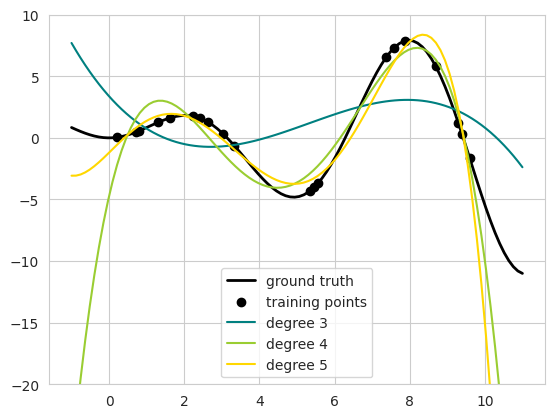

In [193]:
# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(
    color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
)
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
